In [14]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [15]:
train_labels = []
train_samples = []

In [16]:
# 5% of younger individuals (13-64) who *did* experience side effects
# 5% of older individuals (65-100) who *did not* experience side effects
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65, 100)#outlier brute
    train_samples.append(random_older)
    train_labels.append(0)

# 95% of younger individuals (13-64) who *did not* experience side effects
# 95% of older individuals (65-100) who *did* experience side effects
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)


In [17]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

# Shuffle data
train_labels, train_samples = shuffle(train_labels, train_samples)

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features (reshape needed for 1D data)
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

# Print scaled features
for i in scaled_train_samples:
    print(i)

[0.95402299]
[0.10344828]
[0.10344828]
[0.47126437]
[0.1954023]
[0.6091954]
[0.70114943]
[0.51724138]
[0.1954023]
[0.75862069]
[0.28735632]
[0.71264368]
[0.85057471]
[0.64367816]
[0.70114943]
[0.64367816]
[1.]
[0.98850575]
[1.]
[0.86206897]
[0.75862069]
[0.45977011]
[0.72413793]
[0.04597701]
[0.81609195]
[0.4137931]
[0.83908046]
[0.10344828]
[0.18390805]
[0.96551724]
[0.79310345]
[0.27586207]
[0.90804598]
[0.7816092]
[0.42528736]
[0.96551724]
[0.93103448]
[0.7816092]
[0.5862069]
[0.32183908]
[0.31034483]
[0.97701149]
[0.75862069]
[0.75862069]
[0.09195402]
[0.88505747]
[0.95402299]
[0.3908046]
[0.56321839]
[0.44827586]
[0.43678161]
[0.55172414]
[0.43678161]
[0.83908046]
[0.90804598]
[0.7816092]
[0.91954023]
[0.71264368]
[0.82758621]
[0.98850575]
[0.94252874]
[0.17241379]
[0.65517241]
[1.]
[0.63218391]
[0.37931034]
[0.22988506]
[0.97701149]
[0.36781609]
[0.4137931]
[0.63218391]
[0.89655172]
[0.86206897]
[0.04597701]
[0.67816092]
[0.29885057]
[0.82758621]
[0.91954023]
[0.89655172]
[0.1149

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [19]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split = 0.1,batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 2s - 8ms/step - accuracy: 0.5519 - loss: 0.6557 - val_accuracy: 0.5667 - val_loss: 0.6461
Epoch 2/30
189/189 - 0s - 3ms/step - accuracy: 0.6296 - loss: 0.6241 - val_accuracy: 0.6714 - val_loss: 0.6131
Epoch 3/30
189/189 - 0s - 2ms/step - accuracy: 0.7116 - loss: 0.5857 - val_accuracy: 0.7476 - val_loss: 0.5756
Epoch 4/30
189/189 - 1s - 5ms/step - accuracy: 0.7677 - loss: 0.5478 - val_accuracy: 0.7762 - val_loss: 0.5396
Epoch 5/30
189/189 - 1s - 6ms/step - accuracy: 0.8016 - loss: 0.5120 - val_accuracy: 0.7952 - val_loss: 0.5046
Epoch 6/30
189/189 - 1s - 6ms/step - accuracy: 0.8291 - loss: 0.4781 - val_accuracy: 0.8190 - val_loss: 0.4714
Epoch 7/30
189/189 - 1s - 3ms/step - accuracy: 0.8497 - loss: 0.4469 - val_accuracy: 0.8476 - val_loss: 0.4409
Epoch 8/30
189/189 - 1s - 3ms/step - accuracy: 0.8741 - loss: 0.4186 - val_accuracy: 0.8667 - val_loss: 0.4124
Epoch 9/30
189/189 - 0s - 2ms/step - accuracy: 0.8841 - loss: 0.3934 - val_accuracy: 0.8667 - val_loss: 0.3882
E

In [26]:
test_labels = []
test_samples = []

# 5% of younger individuals (13-64) who *did* experience side effects
# 5% of older individuals (65-100) who *did not* experience side effects
for i in range(50):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

# 95% of younger individuals (13-64) who *did not* experience side effects
# 95% of older individuals (65-100) who *did* experience side effects
for i in range(1000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

# Shuffle data
test_labels, test_samples = shuffle(test_labels, test_samples)

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features (reshape needed for 1D data)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))


In [27]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)

In [28]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
1
0
0
1
1
0
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
1
1
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
1
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
1
1
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
0
1
1
0
0
0
0


In [29]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [30]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [32]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[ 979   71]
 [  50 1000]]


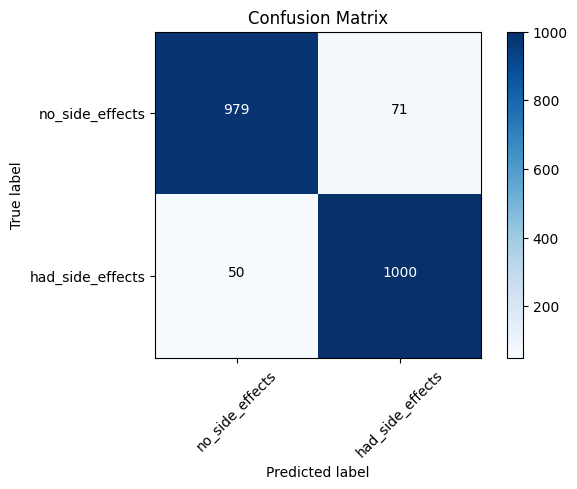

In [34]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')